In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

### <font color='light blue'>Data Definition
    There are 25 variables:
    
        - ID: ID of each client
        - LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
        - SEX: Gender (1=male, 2=female)
        - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
        - MARRIAGE: Marital status (1=married, 2=single, 3=others)
        - AGE: Age in years
        - PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
        - PAY_2: Repayment status in August, 2005 (scale same as above)
        - PAY_3: Repayment status in July, 2005 (scale same as above)
        - PAY_4: Repayment status in June, 2005 (scale same as above)
        - PAY_5: Repayment status in May, 2005 (scale same as above)
        - PAY_6: Repayment status in April, 2005 (scale same as above)
        - BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
        - BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
        - BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
        - BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
        - BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
        - BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
        - PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
        - PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
        - PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
        - PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
        - PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
        - PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
        - default.payment.next.month: Default payment (1=yes, 0=no)
</font>

In [2]:
## REad the dataset
CreditCard = pd.read_csv('UCI_Credit_Card.csv')
CreditCard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
CreditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## <font color='blue'>After getting information about data whether dtypes and any null value is present in data. We not found any null values.</font>

In [4]:
# Summary Statitics
CreditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## <font color='orange'>we can see that education and marriage having min. value is 0, but as per data defination min. data is starting from 1. So, we have to change information. Even Education column encoded wrongly. **'Unknown'** encoded two different number.</font>

### <font color='blue'> change the column name 'default.payment.next.month' as 'Default_Payment'.</font>

# Exploratory Data Analysis

## Analysis of Dependent Variable:

In [5]:
#renaming for better convinience
CreditCard.rename(columns={'default.payment.next.month':'Default_Payment'}, inplace=True) # rename default.payment.next.month as 'Default_Payment'

In [6]:
#display the top records
CreditCard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# counts the dependent variable data set
CreditCard['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

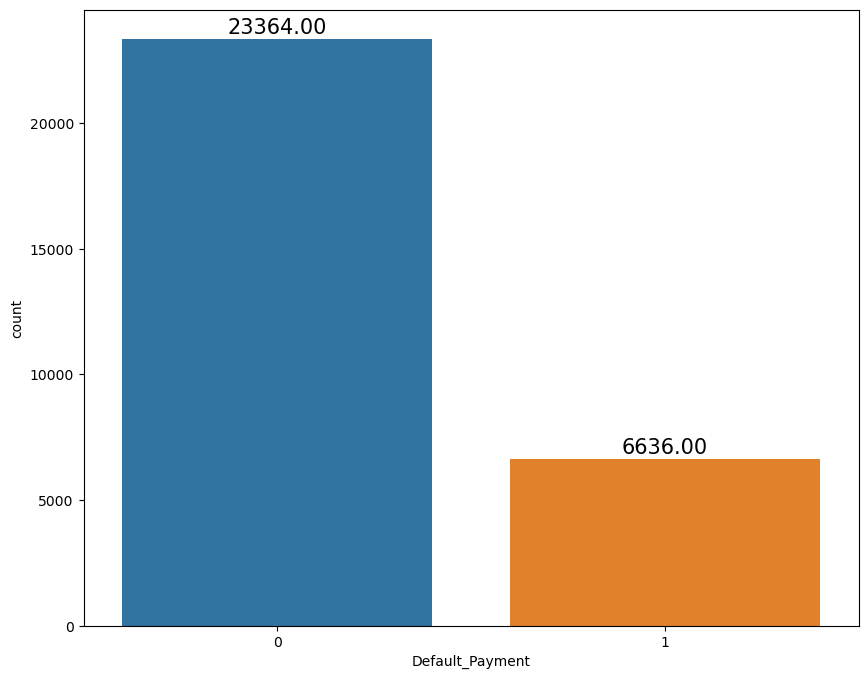

In [8]:
#plotting the count plot to vizualize the data distribution 
#plot the count plot to check the data distribution
plt.figure(figsize=(10,8))
plots = sns.countplot(x = 'Default_Payment', data = CreditCard)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Finally showing the plot
plt.show()

### From the above data analysis we can say that

>- 0 - Not Default
>- 1 - Default

### <font color='sky blue'>Defaulters are less than the Non Defaulters in the given dataset.</font>

In [9]:
# get percentage of target variable of Defaulter and Non Defaulter
count_no_sub = len(CreditCard[CreditCard['Default_Payment']==0])
count_sub = len(CreditCard[CreditCard['Default_Payment']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no defaulter is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of defaulter", pct_of_sub*100)

percentage of no defaulter is 77.88000000000001
percentage of defaulter 22.12


#### Our classes are imbalanced, and the ratio of no-defaulters to defaulters instances is 78:22. Before we go ahead to balance the classes, let’s do some more exploration.

In [10]:
CreditCard.groupby('Default_Payment').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Default_Payment,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


## Analysis of Independent Variable:

### <font color='green'>Let'Check how they are related with out target class.</font>
## SEX

In [11]:
# counts the SEX variable data set
CreditCard['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

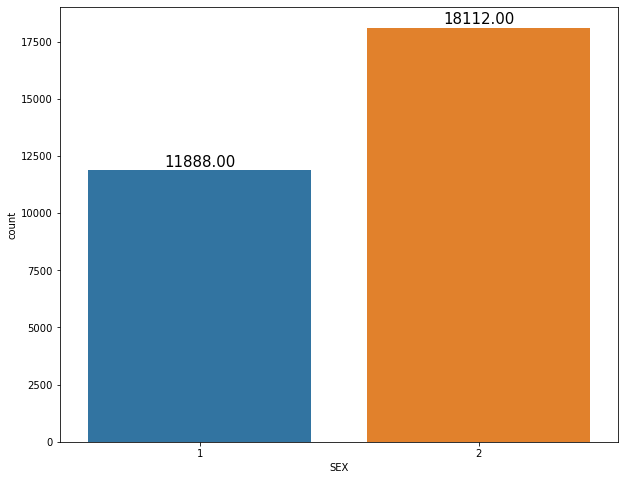

In [12]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,8))
plots = sns.countplot(x = 'SEX', data = CreditCard)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Finally showing the plot
plt.show()

### From the above data analysis we can say that

>- 1 - Male
>- 2 - Female
### <font color='sky blue'>Number of Male credit holder is less than Female.</font>

In [13]:
CreditCard.groupby(['SEX']).mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763


## Education

In [14]:
# counts the education  data set variable data set
CreditCard['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

#### <font color='orange'>EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.</font>

In [15]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

CreditCard["EDUCATION"] = CreditCard["EDUCATION"].replace({4:0,5:0,6:0})
CreditCard["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

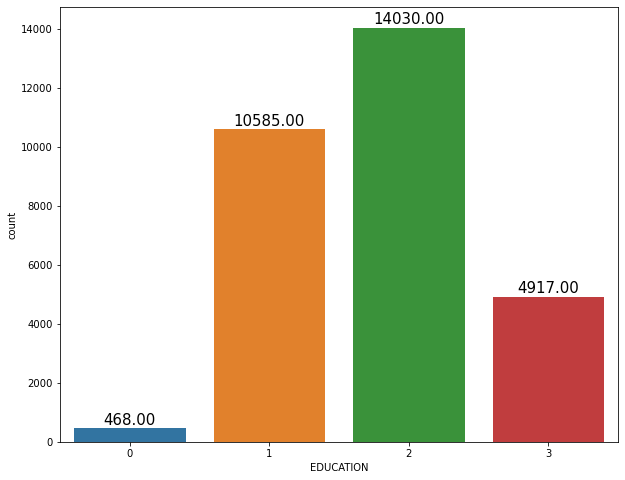

In [16]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,8))
plots = sns.countplot(x = 'EDUCATION', data = CreditCard)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Finally showing the plot
plt.show()

### From the above data analysis we can say that

>- 1 = graduate school
>- 2 = university 
>- 3 = high school; 
>- 0 = others
### <font color='sky blue'> More number of credit holders are university students followed by Graduates and then High school students.</font>

In [17]:
CreditCard.groupby(['EDUCATION']).mean()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,17557.254274,181316.239316,1.636752,1.517094,36.143162,-0.239316,-0.448718,-0.493590,-0.508547,-0.525641,...,53971.143162,46015.284188,40488.354701,6248.412393,8118.194444,8340.756410,4962.378205,5696.822650,7476.096154,0.070513
1,14697.212187,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,15024.237776,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,15342.314013,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576


## Marriage

In [18]:
# counts the education  data set
CreditCard['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

#### <font color='orange'>'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only 54 observations of 0, we will combine 0 and 3 in one value as 'others'.</font>

In [19]:
# Change values 0 to 3 and define 3 as 'others'
CreditCard["MARRIAGE"] = CreditCard["MARRIAGE"].replace({0:3})
CreditCard["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

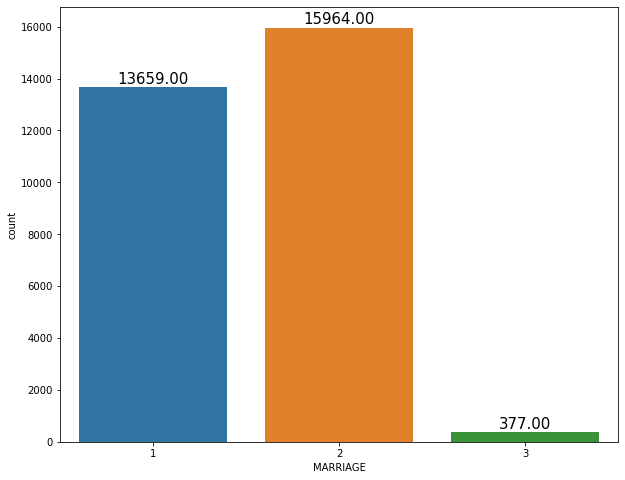

In [20]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,8))
plots = sns.countplot(x = 'MARRIAGE', data = CreditCard)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Finally showing the plot
plt.show()

### From the above data analysis we can say that

>- 1 - married
>- 2 - single
>- 3 - others
### <font color='sky blue'> More number of credit cards holder are Single.</font>

In [21]:
CreditCard.groupby(['MARRIAGE']).mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
1,15253.288821,182200.893184,1.620031,1.902702,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,44891.819094,41975.121824,40250.686946,5789.741562,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,0.234717
2,14807.277813,156413.660737,1.589514,1.664746,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,42194.771674,39207.970120,37974.720308,5523.197194,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,0.209283
3,14023.726790,103076.923077,1.615385,2.204244,42.084881,0.122016,-0.029178,-0.007958,-0.074271,-0.180371,...,29479.514589,26758.103448,26897.198939,7037.175066,7137.039788,5846.119363,4797.901857,4214.509284,3241.315650,0.236074


## AGE

In [22]:
#check the mean of the age group rescpective to the Default_Payment
CreditCard.groupby('Default_Payment')['AGE'].mean()

Default_Payment
0    35.417266
1    35.725738
Name: AGE, dtype: float64

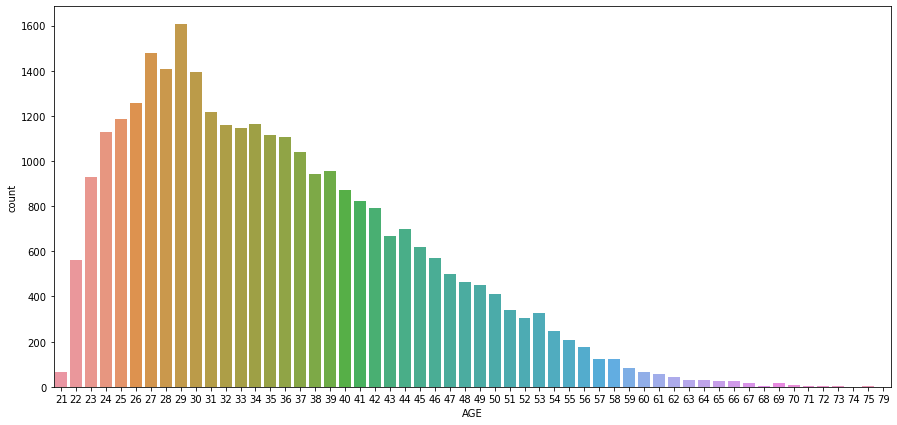

In [23]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
plots = sns.countplot(x = 'AGE', data = CreditCard)
plt.show()

### From the above data analysis we can say that

>- <font color='green'> We can see more number of credit cards holder age are between 26-30 years old.</font>
>- <font color='blue'> Age above 60 years old rarely uses the credit card.</font>

# Bivariate Analysis
## Sex and Default_Payment

In [24]:
CreditCard.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Payment'],
      dtype='object')

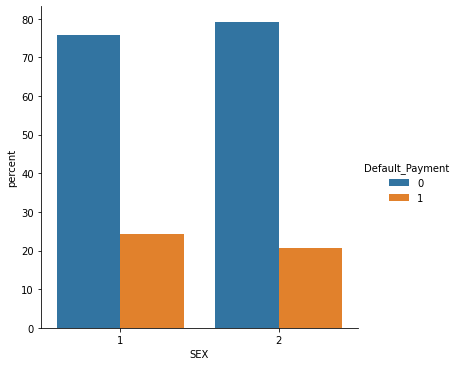

In [25]:
#plotting the cat plot to vizualize the data distribution related to the Default_Payment
x,y = 'SEX', 'Default_Payment'

(CreditCard
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### <font color='sky blue'>It is evident from the above graph that the number of defaulter have high proportion of males.</font>

## Education and Default_Payment

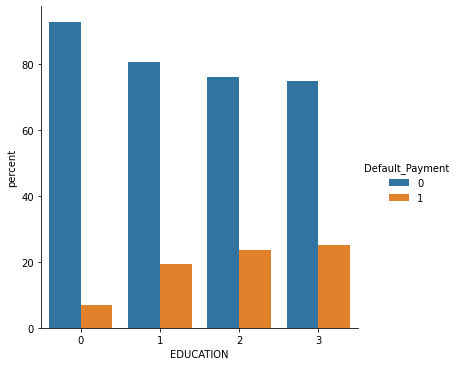

In [26]:
#plotting the cat plot to vizualize the data distribution related to the Default_Payment
x,y = 'EDUCATION', 'Default_Payment'

(CreditCard
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### <font color='sky blue'> From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people.</font>

## Marriage and Default_Payment

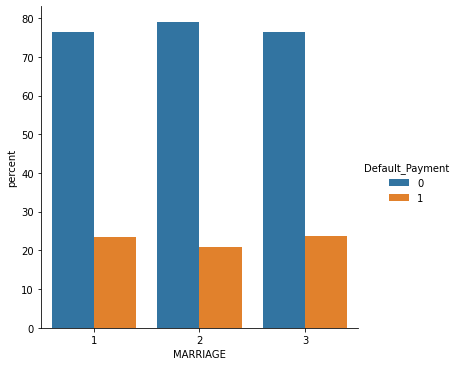

In [27]:
#plotting the cat plot to vizualize the data distribution related to the Default_Payment
x,y = 'MARRIAGE', 'Default_Payment'

(CreditCard
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### <font color='sky blue'> From the above plot it is clear that those people who are other have higher default payment.</font>

## Checking of Correlation between variables

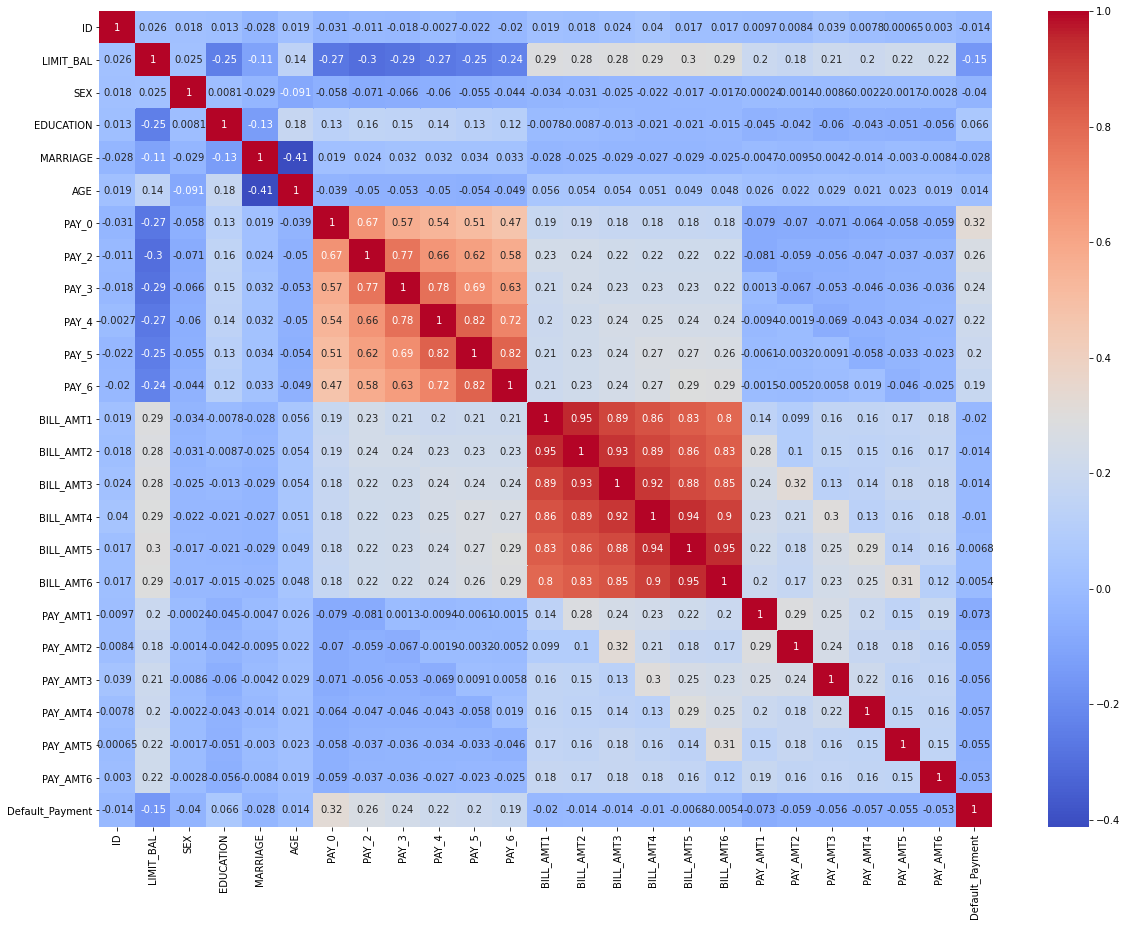

In [28]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(CreditCard.corr(),annot=True,cmap="coolwarm")
plt.show()

>- <font color='blue'>It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.</font>
>- <font color='red'>ID is unimportant and it has no role in prediction so we will remove it.</font>

# Preprocessing

### One Hot Encoding

In [29]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [30]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID
    df = df.drop('ID', axis=1)
    
    df = onehot_encode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    return df

In [31]:
new_df = preprocess_inputs(CreditCard)

In [32]:
new_df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,Default_Payment,EDU_0,EDU_1,EDU_2,EDU_3,MAR_1,MAR_2,MAR_3
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,1,0,0,1,0,1,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0.0,2000.0,1,0,0,1,0,0,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1000.0,5000.0,0,0,0,1,0,0,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1069.0,1000.0,0,0,0,1,0,1,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,689.0,679.0,0,0,0,1,0,1,0,0


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        30000 non-null  float64
 1   SEX              30000 non-null  int64  
 2   AGE              30000 non-null  int64  
 3   PAY_0            30000 non-null  int64  
 4   PAY_2            30000 non-null  int64  
 5   PAY_3            30000 non-null  int64  
 6   PAY_4            30000 non-null  int64  
 7   PAY_5            30000 non-null  int64  
 8   PAY_6            30000 non-null  int64  
 9   BILL_AMT1        30000 non-null  float64
 10  BILL_AMT2        30000 non-null  float64
 11  BILL_AMT3        30000 non-null  float64
 12  BILL_AMT4        30000 non-null  float64
 13  BILL_AMT5        30000 non-null  float64
 14  BILL_AMT6        30000 non-null  float64
 15  PAY_AMT1         30000 non-null  float64
 16  PAY_AMT2         30000 non-null  float64
 17  PAY_AMT3    

## finding Multicollinearity

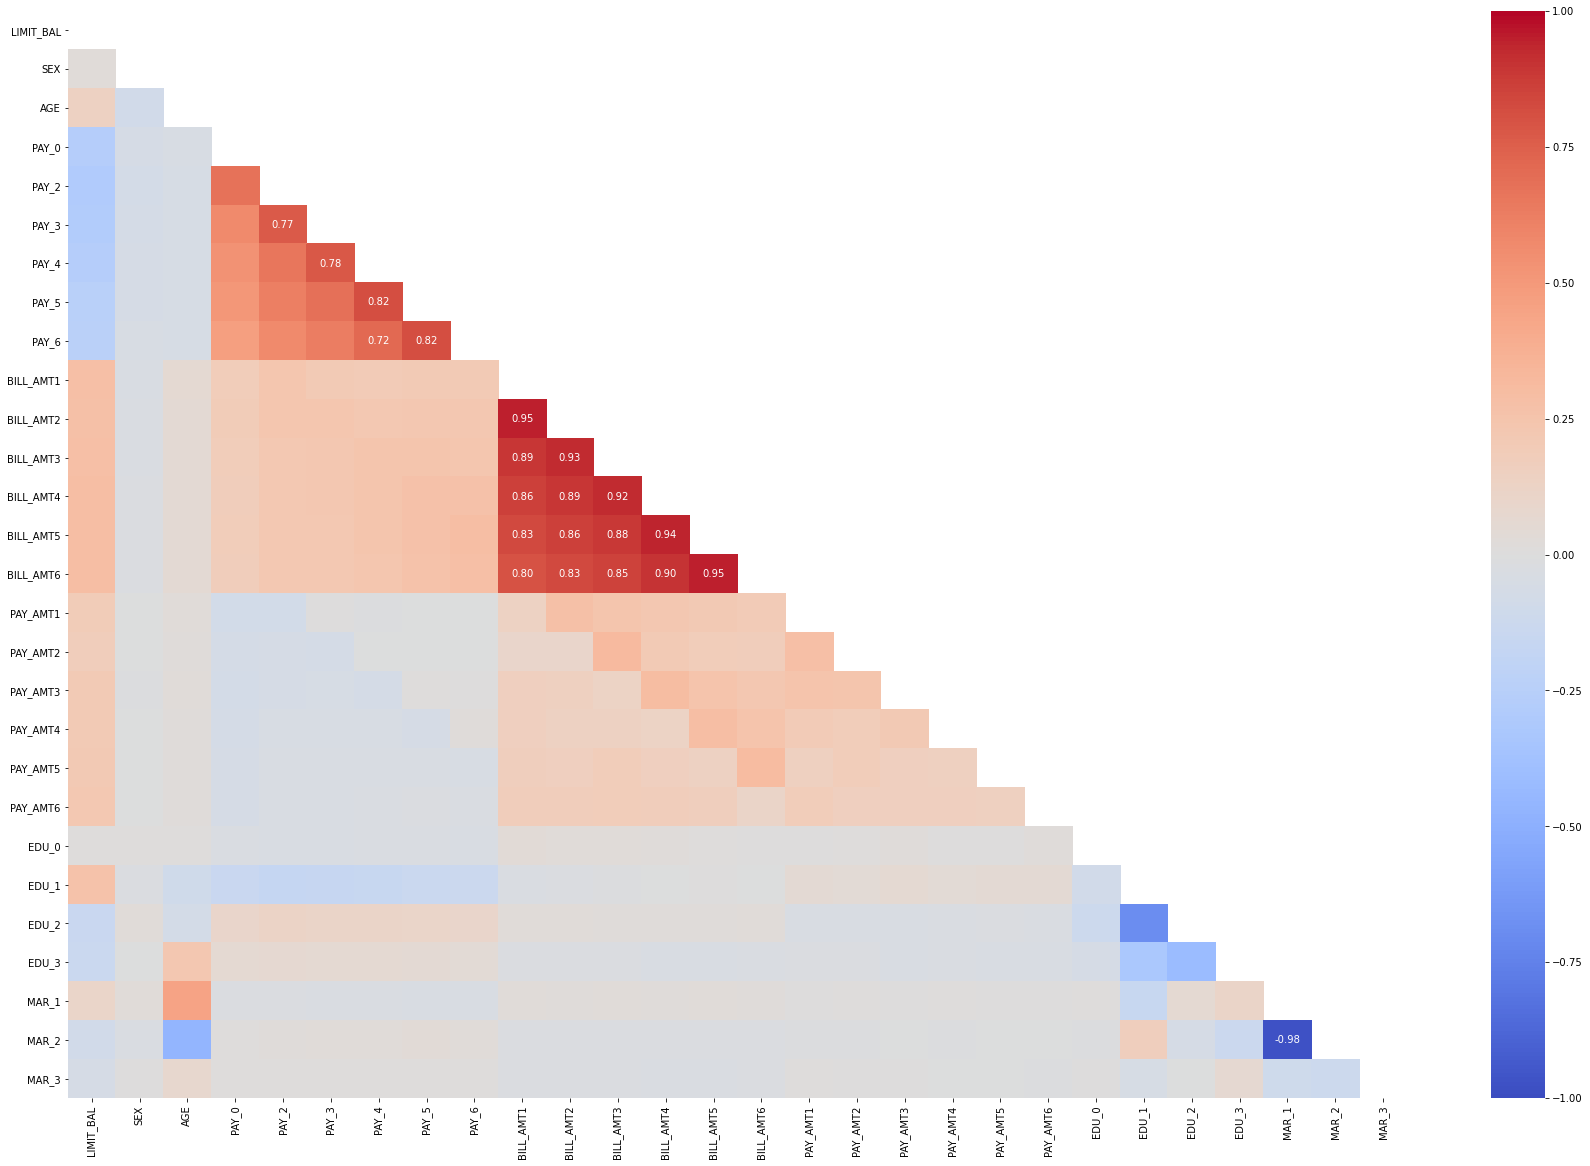

In [34]:
## Computing the correlation coefficient with Default_Payment

# set figure size
plt.figure(figsize=(30,20))

corr = new_df.drop('Default_Payment',axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,vmax=1.0,vmin=-1.0,cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.7 or less than -0.7 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

These columns having strong relationships among 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6'.

## <font color='red'> Computing VIF </font>

In [35]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = new_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [36]:
# features to consider removing
considered_features = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
6,BILL_AMT2,16.274695
9,BILL_AMT5,15.857439
8,BILL_AMT4,13.473144
5,BILL_AMT1,10.869111
7,BILL_AMT3,10.854848
10,BILL_AMT6,9.723889
3,PAY_5,4.659815
2,PAY_4,4.216010
1,PAY_3,3.617185
4,PAY_6,3.214427


>- As shown in the table,‘BILL_AMT2’,‘BILL_AMT5’,‘BILL_AMT4’,‘BILL_AMT1’,‘BILL_AMT3’ and ‘BILL_AMT6’ all have VIF values exceeding 5.

>- Again, the rookie mistake would be to remove all features at once. Feature selection is usually best performed by including or removing one feature at a time. This ensures that any information loss is minimized.

>- After removing ‘‘BILL_AMT2’’ (i.e. the feature with the highest VIF), we calculate the VIF values again.

In [37]:
# compute vif values after removing a feature
considered_features.remove('BILL_AMT2')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
8,BILL_AMT5,15.851850
7,BILL_AMT4,13.399434
9,BILL_AMT6,9.719705
6,BILL_AMT3,9.272405
5,BILL_AMT1,5.285048
3,PAY_5,4.659039
2,PAY_4,4.211944
1,PAY_3,3.562662
4,PAY_6,3.214043
0,PAY_2,2.594985


In [38]:
# compute vif values after removing a feature
considered_features.remove('BILL_AMT5')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
7,BILL_AMT4,10.366555
6,BILL_AMT3,9.266619
8,BILL_AMT6,5.525964
5,BILL_AMT1,5.277694
3,PAY_5,4.655057
2,PAY_4,4.210746
1,PAY_3,3.562484
4,PAY_6,3.185501
0,PAY_2,2.594695


In [39]:
# compute vif values after removing a feature
considered_features.remove('BILL_AMT4')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
6,BILL_AMT3,6.722692
5,BILL_AMT1,5.173807
3,PAY_5,4.596771
2,PAY_4,4.202954
7,BILL_AMT6,3.920209
1,PAY_3,3.562478
4,PAY_6,3.182068
0,PAY_2,2.591596


In [40]:
# compute vif values after removing a feature
considered_features.remove('BILL_AMT3')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,PAY_5,4.596574
2,PAY_4,4.174719
1,PAY_3,3.561618
4,PAY_6,3.177853
6,BILL_AMT6,2.949918
5,BILL_AMT1,2.876098
0,PAY_2,2.582360


>- As we saw after removing Bill_Amt2,Bill_Amt5, Bill_Amt4 and Bill_Amt3, Now we successed the vif value less than 5.
>- So, we will remove these columns while building model.

# Modeling

In [41]:
# Import Packages for performing models

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Already we know that what are column having high multicollinearity so we will drop those columns with target column

In [42]:
# Split new_df into X and y

X = new_df.drop(['Default_Payment','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5'],axis=1)
y = new_df['Default_Payment']

In [43]:
X.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_0,EDU_1,EDU_2,EDU_3,MAR_1,MAR_2,MAR_3
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0,0,1,0,1,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,0,0,1,0,0,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,0,1,0,0,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,0,1,0,1,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,0,1,0,1,0,0


In [44]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default_Payment, dtype: int64

In [45]:
X.shape,y.shape

((30000, 24), (30000,))

In [46]:
# Scale X with a standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [47]:
X.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_0,EDU_1,EDU_2,EDU_3,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.308063,-0.314136,-0.293382,-0.125886,-0.738375,1.0669,-0.442752,1.093780,-1.066471,-0.112812
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.244230,-0.314136,-0.180878,-0.125886,-0.738375,1.0669,-0.442752,-0.914261,0.937672,-0.112812
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.244230,-0.248683,-0.012122,-0.125886,-0.738375,1.0669,-0.442752,-0.914261,0.937672,-0.112812
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.237846,-0.244166,-0.237130,-0.125886,-0.738375,1.0669,-0.442752,1.093780,-1.066471,-0.112812
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,0.266434,-0.269039,-0.255187,-0.125886,-0.738375,1.0669,-0.442752,1.093780,-1.066471,-0.112812


In [48]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
X_train.shape,y_train.shape

((21000, 24), (21000,))

## <font color='red'> Logistic Regression after removing multicollinearity </font>

In [50]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.645824
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        Default_Payment   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20978
Method:                           MLE   Df Model:                           21
Date:                Wed, 27 Jul 2022   Pseudo R-squ.:                 -0.2179
Time:                        14:57:25   Log-Likelihood:                -13562.
converged:                      False   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.0296      0.018     -1.611      0.107      -0.065       0.006
SEX           -0.0388      0.015     -2.646      0.008      -0.06

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## <font color='red'>Logistic Regression Model Fitting</font>

In [51]:
# build the model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
# predict the model
y_pred = logreg.predict(X_test)

[[6827  213]
 [1497  463]]


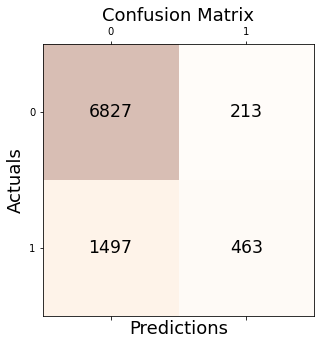

Accuracy of logistic regression classifier: 0.81


In [53]:
# Build the confusion matrix
cm_lr= confusion_matrix(y_test, y_pred)
print(cm_lr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_lr, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(x=j, y=i,s=cm_lr[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Let's check the overall accuracy.
accuracy_lr = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier: {:.2f}'.format(accuracy_lr))

In [54]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.68
Recall: 0.24
F1 Score: 0.35
Sensitivity : 0.97
Specificity : 0.24


In [55]:
clf_report_lr = classification_report(y_pred,y_test)
print(clf_report_lr)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8324
           1       0.24      0.68      0.35       676

    accuracy                           0.81      9000
   macro avg       0.60      0.75      0.62      9000
weighted avg       0.91      0.81      0.85      9000



     Features  Importance
3       PAY_0    0.649630
12   PAY_AMT2    0.224256
9   BILL_AMT1    0.188629
11   PAY_AMT1    0.123682
17      EDU_0    0.117682
4       PAY_2    0.109485
0   LIMIT_BAL    0.103308
5       PAY_3    0.094162
2         AGE    0.066223
10  BILL_AMT6    0.065395


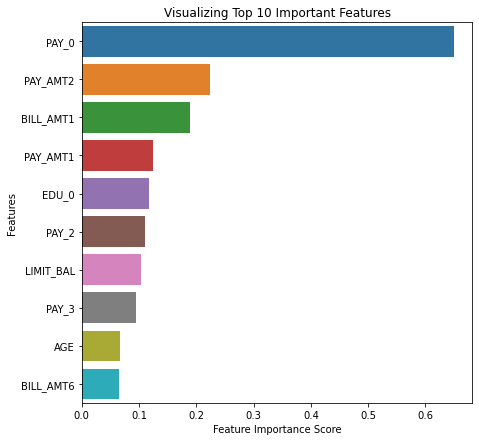

In [56]:
# Summarize feature importance scores
feature_imp = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(logreg.coef_).ravel() })

feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)

# list top 10 important features
feature_imp = feature_imp[:10]

# display the scores of top 10
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(y='Features',x='Importance',data=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

>- from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_0, PAY_AMT2 and BILL_AMT1.

## <font color='red'>RandomForest Model </font>

In [57]:
# build model
rf_clf = RandomForestClassifier()

# fit the model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
# Get the predicted class
y_pred = rf_clf.predict(X_test)

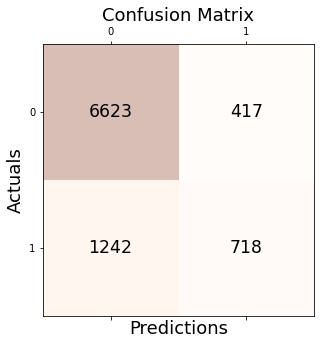

Accuracy of logistic regression classifier: 0.82


In [59]:
# Create a confusion matrix
cm_rf= confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,s=cm_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Let's check the overall accuracy.
accuracy_rf = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier: {:.2f}'.format(accuracy_rf))

In [60]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.63
Recall: 0.37
F1 Score: 0.46
Sensitivity : 0.94
Specificity : 0.37


In [61]:
clf_report_rf = classification_report(y_pred,y_test)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7865
           1       0.37      0.63      0.46      1135

    accuracy                           0.82      9000
   macro avg       0.65      0.74      0.68      9000
weighted avg       0.87      0.82      0.84      9000



     Features  Importance
3       PAY_0    0.099032
9   BILL_AMT1    0.081972
2         AGE    0.079211
0   LIMIT_BAL    0.071295
10  BILL_AMT6    0.070432
11   PAY_AMT1    0.066796
12   PAY_AMT2    0.063576
13   PAY_AMT3    0.060648
16   PAY_AMT6    0.059828
14   PAY_AMT4    0.057376


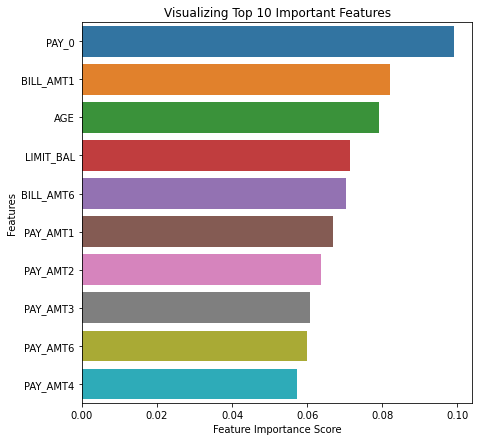

In [62]:
# Summarize feature importance scores
feature_imp = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(rf_clf.feature_importances_).ravel() })

feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)

# list top 10 important features
feature_imp = feature_imp[:10]

# display the scores of top 10
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(y='Features',x='Importance',data=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

>- from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_0, BILL_AMT1 and AGE.

### Now let’s check the accuracy with GridSearchCV and RandomSearchCV.

## <font color='blue'> With GridSearchCV </font>

In [63]:
#set the parmeter
param_grid = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [64]:
# fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy', verbose=3)

In [65]:
# Finding the best parameters
rf_df = grid_rf_clf.best_estimator_
rf_df

RandomForestClassifier(max_depth=12, max_features=9)

In [66]:
# Get the predicted class
y_pred = rf_df.predict(X_test)

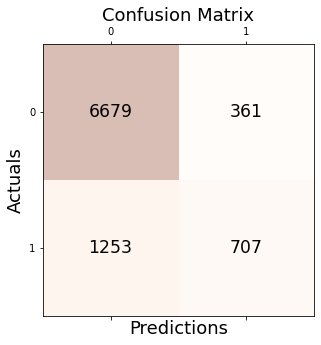

Accuracy of logistic regression classifier on test set: 0.82


In [67]:
conf_rf= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_rf.shape[0]):
    for j in range(conf_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_rf = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_rf))

In [68]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = conf_rf[0,0]/(conf_rf[0,0]+conf_rf[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = conf_rf[1,1]/(conf_rf[1,0]+conf_rf[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.66
Recall: 0.36
F1 Score: 0.47
Sensitivity : 0.95
Specificity : 0.36


In [69]:
clf_report_rf = classification_report(y_pred,y_test)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7932
           1       0.36      0.66      0.47      1068

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.68      9000
weighted avg       0.88      0.82      0.84      9000



     Features  Importance
3       PAY_0    0.230180
4       PAY_2    0.081711
9   BILL_AMT1    0.069633
5       PAY_3    0.057331
11   PAY_AMT1    0.053430
10  BILL_AMT6    0.052886
0   LIMIT_BAL    0.050520
2         AGE    0.050315
13   PAY_AMT3    0.046705
12   PAY_AMT2    0.046278


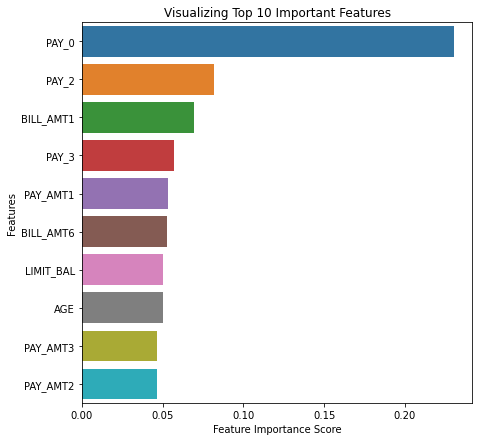

In [70]:
# Summarize feature importance scores
feature_imp = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(rf_df.feature_importances_).ravel() })

feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)

# list top 10 important features
feature_imp = feature_imp[:10]

# display the scores of top 10
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(y='Features',x='Importance',data=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

>- from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_0,PAY_2.

## <font color='blue'> With RandomizedSearchCV </font>

In [71]:
from sklearn.model_selection import RandomizedSearchCV

# set the parameter
forest_params = [{'max_depth': list(range(10, 25)), 'max_features': list(range(0,15))}]

In [72]:
rf_RandomGrid = RandomizedSearchCV(RandomForestClassifier(), forest_params, cv = 10, scoring='accuracy')
rf_RandomGrid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [10, 11, 12, 13, 14, 15,
                                                       16, 17, 18, 19, 20, 21,
                                                       22, 23, 24],
                                         'max_features': [0, 1, 2, 3, 4, 5, 6,
                                                          7, 8, 9, 10, 11, 12,
                                                          13, 14]}],
                   scoring='accuracy')

In [73]:
# Finding the best parameters
rf_random = rf_RandomGrid.best_estimator_
rf_random

RandomForestClassifier(max_depth=24, max_features=5)

In [74]:
# Get the predicted class
y_pred = rf_random.predict(X_test)

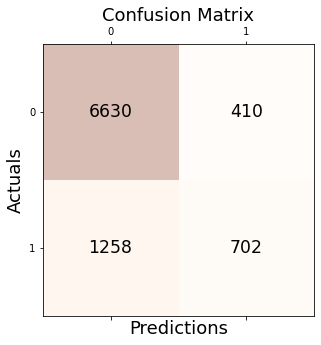

Accuracy of logistic regression classifier on test set: 0.81


In [75]:
# build the confusion matrix
conf_rf= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_rf.shape[0]):
    for j in range(conf_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_rf = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_rf))

In [76]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = conf_rf[0,0]/(conf_rf[0,0]+conf_rf[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = conf_rf[1,1]/(conf_rf[1,0]+conf_rf[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.63
Recall: 0.36
F1 Score: 0.46
Sensitivity : 0.94
Specificity : 0.36


In [77]:
clf_report_rf = classification_report(y_pred,y_test)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7888
           1       0.36      0.63      0.46      1112

    accuracy                           0.81      9000
   macro avg       0.65      0.74      0.67      9000
weighted avg       0.87      0.81      0.83      9000



     Features  Importance
3       PAY_0    0.114525
9   BILL_AMT1    0.083682
2         AGE    0.073892
10  BILL_AMT6    0.070713
11   PAY_AMT1    0.067180
0   LIMIT_BAL    0.065328
12   PAY_AMT2    0.062224
13   PAY_AMT3    0.060322
16   PAY_AMT6    0.058735
14   PAY_AMT4    0.057578


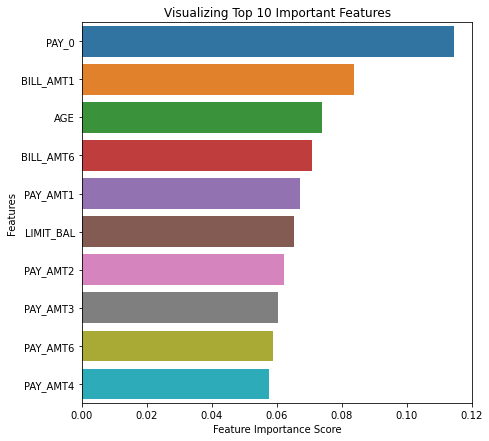

In [78]:
# Summarize feature importance scores
feature_imp = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(rf_random.feature_importances_).ravel() })

feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)

# list top 10 important features
feature_imp = feature_imp[:10]

# display the scores of top 10
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(y='Features',x='Importance',data=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

###  We implemented the Random Forest algorithm without hyperparameter tuning and got the lowest accuracy of 82 %. 
### And then we implemented GridSearchCV and RandomSearchCV and checked the accuracy score with both techniques. The accuracy is almost the same in both cases.

# **Implementing XGBoost** 

In [79]:
from xgboost import XGBClassifier

In [80]:
# build the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
# predict the model
y_pred = model.predict(X_test)

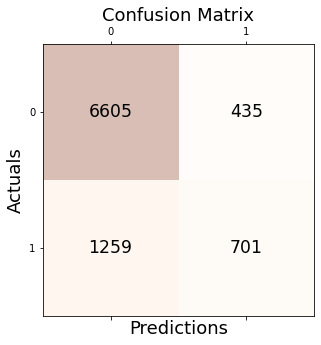

Accuracy of logistic regression classifier on test set: 0.81


In [82]:
# build the confusion matrix
conf_xgb= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_xgb, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_xgb.shape[0]):
    for j in range(conf_xgb.shape[1]):
        ax.text(x=j, y=i,s=conf_xgb[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_xgb = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_xgb))

In [83]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = conf_xgb[0,0]/(conf_xgb[0,0]+conf_xgb[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = conf_xgb[1,1]/(conf_xgb[1,0]+conf_xgb[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.62
Recall: 0.36
F1 Score: 0.45
Sensitivity : 0.94
Specificity : 0.36


In [84]:
clf_report_xgb = classification_report(y_pred,y_test)
print(clf_report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7864
           1       0.36      0.62      0.45      1136

    accuracy                           0.81      9000
   macro avg       0.65      0.73      0.67      9000
weighted avg       0.86      0.81      0.83      9000



PAY_0        0.341125
PAY_2        0.124462
PAY_3        0.047448
PAY_4        0.046629
EDU_0        0.033148
PAY_6        0.030779
MAR_2        0.030584
PAY_5        0.026712
PAY_AMT3     0.024029
BILL_AMT1    0.022353
dtype: float32


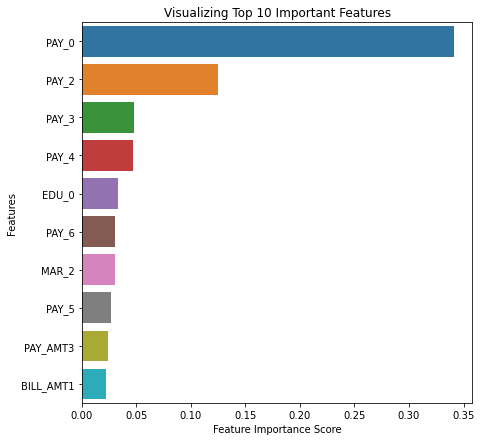

In [85]:
# Feature Importance
feature_importances_xgb = pd.Series(model.feature_importances_,
                                    index = list(X.columns)).sort_values(ascending=False)

# list top 10 important features
feature_importances_xgb = feature_importances_xgb[:10]

# display the scores of top 10
print(feature_importances_xgb)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_importances_xgb[:10], y=feature_importances_xgb.index[:10])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

>- from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_0 and PAY_2.

# SMOTE for Balancing Data

In [86]:
#!pip install imblearn

In [87]:
#import the module 
from imblearn.over_sampling import SMOTE
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()

# fit with resample for Xtrain and ytrain 
X_train_sm, y_train_sm = smt.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 16324, 1: 4676})
After Counter({1: 16324, 0: 16324})


## <font color='red'>Logistic Regression Model after SMOTE</font>

In [88]:
# build the model
logreg = LogisticRegression()
# fit the model
logreg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [89]:
#predict the model
y_pred = logreg.predict(X_test)

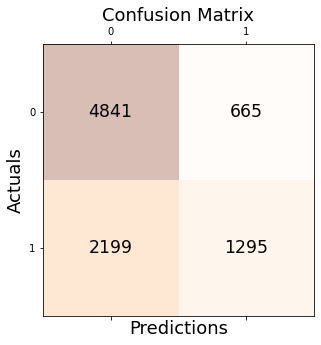

Accuracy of logistic regression classifier on test set: 0.68


In [90]:
# Create cinnfusion matrix
cm = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_lr_sm= accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_lr_sm))


In [91]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.37
Recall: 0.66
F1 Score: 0.47
Sensitivity : 0.88
Specificity : 0.37


     Features  Importance
3       PAY_0    0.573956
12   PAY_AMT2    0.344924
9   BILL_AMT1    0.240791
11   PAY_AMT1    0.171896
0   LIMIT_BAL    0.156956
10  BILL_AMT6    0.145841
4       PAY_2    0.127121
17      EDU_0    0.118282
13   PAY_AMT3    0.116863
15   PAY_AMT5    0.083227


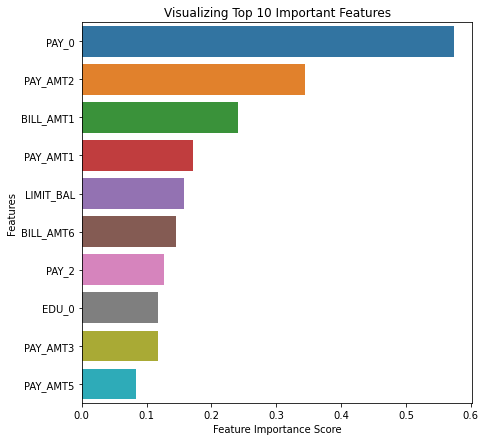

In [92]:
# Summarize feature importance scores
feature_imp = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(logreg.coef_).ravel() })

feature_imp = feature_imp.sort_values(by = 'Importance', ascending=False)

# list top 10 important features
feature_imp = feature_imp[:10]

# display the scores of top 10
print(feature_imp)

# plot feature importance
plt.figure(figsize = (7, 7))
sns.barplot(y='Features',x='Importance',data=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

>- from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_0, PAY_AMT2 and BILL_AMT1.

## <font color='blue'> With GridSearchCV </font>

In [93]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [94]:
#fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [95]:
# find the best parameter
optimized_clf = grid_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=0.01)

In [96]:
# Get the predicted class
y_pred  = optimized_clf.predict(X_test)

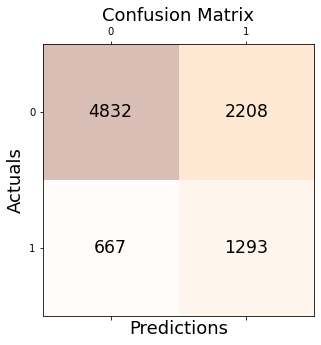

Accuracy of logistic regression classifier on test set: 0.68


In [97]:
# Get the confusion matrix
cm_lr_sm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_lr_sm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_lr_sm.shape[0]):
    for j in range(cm_lr_sm.shape[1]):
        ax.text(x=j, y=i,s=cm_lr_sm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_lr_sm = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_lr_sm))

In [98]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_lr_sm[0,0]/(cm_lr_sm[0,0]+cm_lr_sm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_lr_sm[1,1]/(cm_lr_sm[1,0]+cm_lr_sm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.37
Recall: 0.66
F1 Score: 0.47
Sensitivity : 0.69
Specificity : 0.66


## <font color='blue'> With RandomizedSearchCV </font>

In [99]:
#fit the parameter 
random_lr_clf = RandomizedSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
random_lr_clf.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=3)

In [100]:
# find the best parameter
optimized_clf = random_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=0.01)

In [101]:
# Get the predicted class
y_pred  = optimized_clf.predict(X_test)

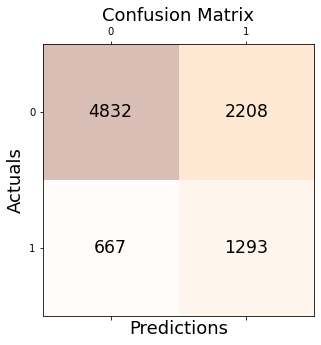

Accuracy of logistic regression classifier on test set: 0.68


In [102]:
# Get the confusion matrix
cm_lr_sm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_lr_sm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_lr_sm.shape[0]):
    for j in range(cm_lr_sm.shape[1]):
        ax.text(x=j, y=i,s=cm_lr_sm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_lr_sm = accuracy_score(y_pred,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_lr_sm))

In [103]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_lr_sm[0,0]/(cm_lr_sm[0,0]+cm_lr_sm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_lr_sm[1,1]/(cm_lr_sm[1,0]+cm_lr_sm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.37
Recall: 0.66
F1 Score: 0.47
Sensitivity : 0.69
Specificity : 0.66


## <font color='red'>Random forest Model after SMOTE</font>

In [104]:
# build the model
rfm = RandomForestClassifier()
# fit the model
rfm.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [105]:
# get the predict class
y_pred_rfm = rfm.predict(X_test)

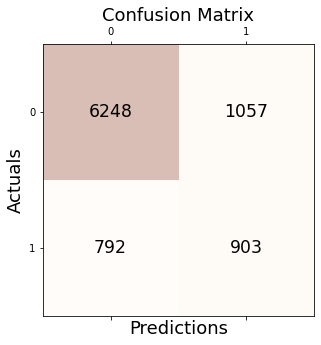

Accuracy of logistic regression classifier on test set: 0.79


In [106]:
# get the confusion matrix
rfm_cm = confusion_matrix(y_pred_rfm,y_test)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(rfm_cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(rfm_cm.shape[0]):
    for j in range(rfm_cm.shape[1]):
        ax.text(x=j, y=i,s=rfm_cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_rfm = accuracy_score(y_pred_rfm,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_rfm))

In [107]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = rfm_cm[0,0]/(rfm_cm[0,0]+rfm_cm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = rfm_cm[1,1]/(rfm_cm[1,0]+rfm_cm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.37
Recall: 0.66
F1 Score: 0.47
Sensitivity : 0.86
Specificity : 0.53


### Now let’s check the accuracy with GridSearchCV and RandomSearchCV.

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [109]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


## <font color='blue'> With GridSearchCV </font>

In [110]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
grid_rf.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [111]:
# find the best parameter
optimized_clf = grid_rf.best_estimator_
optimized_clf

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_split=5,
                       n_estimators=33)

In [112]:
# Get the predicted class
y_pred  = optimized_clf.predict(X_test)

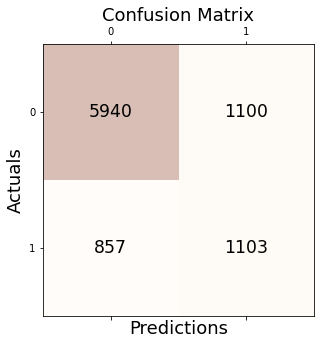

Accuracy of random forest classifier on test set: 0.78


In [113]:
# Get the confusion matrix
cm_rf_sm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_rf_sm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_rf_sm.shape[0]):
    for j in range(cm_rf_sm.shape[1]):
        ax.text(x=j, y=i,s=cm_rf_sm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_rf_sm = accuracy_score(y_pred,y_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_rf_sm))

In [114]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_rf_sm[0,0]/(cm_rf_sm[0,0]+cm_rf_sm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_rf_sm[1,1]/(cm_rf_sm[1,0]+cm_rf_sm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.50
Recall: 0.56
F1 Score: 0.53
Sensitivity : 0.84
Specificity : 0.56


## <font color='blue'> With RandomizedSearchCV </font>

In [115]:
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = 3, verbose=2, n_jobs = 4)
random_rf.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [116]:
# find the best parameter
optimized_clf = random_rf.best_estimator_
optimized_clf

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=80)

In [117]:
# Get the predicted class
y_pred  = optimized_clf.predict(X_test)

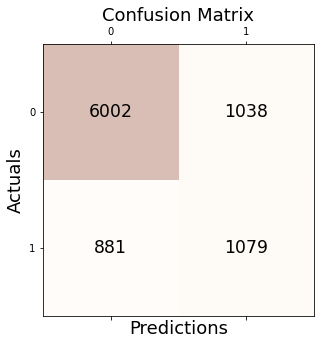

Accuracy of random forest classifier on test set: 0.79


In [118]:
# Get the confusion matrix
cm_rf_sm= confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_rf_sm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_rf_sm.shape[0]):
    for j in range(cm_rf_sm.shape[1]):
        ax.text(x=j, y=i,s=cm_rf_sm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

accuracy_rf_sm = accuracy_score(y_pred,y_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy_rf_sm))

In [119]:
# Let's calculate Sensitivity, Specificity, Recall, Precision and F1-Score

print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))

print('F1 Score: %.2f' % f1_score(y_test, y_pred))

sensitivity = cm_rf_sm[0,0]/(cm_rf_sm[0,0]+cm_rf_sm[0,1])
print('Sensitivity : {:.2f}'.format(sensitivity))

specificity = cm_rf_sm[1,1]/(cm_rf_sm[1,0]+cm_rf_sm[1,1])
print('Specificity : {:.2f}'.format(specificity))

Precision: 0.51
Recall: 0.55
F1 Score: 0.53
Sensitivity : 0.85
Specificity : 0.55
